<a href="https://colab.research.google.com/github/arshad831/Data-Science-Portfolio-sample/blob/master/MLR-advertisementdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all the required python libraries & packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import date, datetime

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data-mlr.csv to data-mlr.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data-mlr.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
# Importing & reading the main dataset
#df = pd.read_csv('Data/curated_data.csv')
df.head()

,Date,data1,data2,data3,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold
0,5/3/22,Tue,NaN,NaN,13,540.45,38915,208,3,5,...,0,1,0,0,0,0,0,487,365,52
1,5/4/22,NaN,NaN,NaN,16,548.41,42258,192,4,5,...,0,0,1,0,0,0,0,439,308,50
2,5/5/22,NaN,NaN,NaN,7,285.47,21238,96,5,5,...,0,0,0,1,0,0,0,357,277,38
3,5/6/22,NaN,NaN,NaN,0,0,0,0,6,5,...,0,0,0,0,1,0,0,370,264,27
4,5/7/22,NaN,NaN,NaN,1,56.12,4253,9,7,5,...,0,0,0,0,0,1,0,306,231,32


In [ ]:
df.shape

(288, 20)

We can notice that we have blank columns and checked for duplicates

In [7]:
df = df.drop(columns=['data1','data2','data3'])

In [8]:
df.drop_duplicates(keep=False)

,Date,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,Year,day of the week,quarter,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold
0,5/3/22,13,540.45,38915,208,3,5,2022,2,2,0,1,0,0,0,0,0,487,365,52
1,5/4/22,16,548.41,42258,192,4,5,2022,3,2,0,0,1,0,0,0,0,439,308,50
2,5/5/22,7,285.47,21238,96,5,5,2022,4,2,0,0,0,1,0,0,0,357,277,38
3,5/6/22,0,0,0,0,6,5,2022,5,2,0,0,0,0,1,0,0,370,264,27
4,5/7/22,1,56.12,4253,9,7,5,2022,6,2,0,0,0,0,0,1,0,306,231,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2/10/23,107,2464.18,163244,1011,10,2,2023,5,1,0,0,0,0,1,0,0,0,0,156
284,2/11/23,98,2381.72,140133,1036,11,2,2023,6,1,0,0,0,0,0,1,0,964,733,123
285,2/12/23,84,1809.46,91056,706,12,2,2023,7,1,0,0,0,0,0,0,1,911,674,117
286,2/13/23,66,1622.82,101713,697,13,2,2023,1,1,1,0,0,0,0,0,0,934,710,137


In [9]:
df = df.fillna(0)
df.isnull().values.any()

False

The data looks clean. Let's check the info

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   288 non-null    datetime64[ns]
 1   Website units sold     288 non-null    int64         
 2   FB_Ad _spend           253 non-null    float64       
 3   FB_Impressions         253 non-null    float64       
 4   FB_Unique Clicks       252 non-null    float64       
 5   Day                    288 non-null    int64         
 6   Month                  288 non-null    int64         
 7   Year                   288 non-null    int64         
 8   day of the week        288 non-null    int64         
 9   quarter                288 non-null    int64         
 10  Monday                 288 non-null    int64         
 11  Tuesday                288 non-null    int64         
 12  Wednesday              288 non-null    int64         
 13  Thurs

In [19]:
df['Date'] = pd.to_datetime(data['Date'])

In [21]:
df

,Date,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,Year,day of the week,quarter,...,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold,FB_Click_Through_Rate
0,2022-05-03,13,540.45,38915.0,208.0,3,5,2022,2,2,...,1,0,0,0,0,0,487.0,365.0,52,0.005345
1,2022-05-04,16,548.41,42258.0,192.0,4,5,2022,3,2,...,0,1,0,0,0,0,439.0,308.0,50,0.004544
2,2022-05-05,7,285.47,21238.0,96.0,5,5,2022,4,2,...,0,0,1,0,0,0,357.0,277.0,38,0.004520
3,2022-05-06,0,0.00,0.0,0.0,6,5,2022,5,2,...,0,0,0,1,0,0,370.0,264.0,27,NaN
4,2022-05-07,1,56.12,4253.0,9.0,7,5,2022,6,2,...,0,0,0,0,1,0,306.0,231.0,32,0.002116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023-02-10,107,2464.18,163244.0,1011.0,10,2,2023,5,1,...,0,0,0,1,0,0,0.0,0.0,156,0.006193
284,2023-02-11,98,2381.72,140133.0,1036.0,11,2,2023,6,1,...,0,0,0,0,1,0,964.0,733.0,123,0.007393
285,2023-02-12,84,1809.46,91056.0,706.0,12,2,2023,7,1,...,0,0,0,0,0,1,911.0,674.0,117,0.007753
286,2023-02-13,66,1622.82,101713.0,697.0,13,2,2023,1,1,...,0,0,0,0,0,0,934.0,710.0,137,0.006853


Date is an object but since the curated data already has the fragmented date columns we can drop it. 

In [23]:
# create explanatory variables
data =df
data['FB_Click_Through_Rate'] = data['FB_Unique Clicks'] / data['FB_Impressions']

first_sale_date = data['Date'].min()
data['Days_Since_First_Sale'] = (data['Date'] - first_sale_date).dt.days

days_in_month = data['Date'].dt.days_in_month
data['Days_To_End_Of_Month'] = days_in_month - data['Day']

data['Sales_In_Last_Week'] = data['Amazon Units Sold'].rolling(window=7).mean()

data['Quarter_Sales'] = data.groupby(['Year', 'quarter'])['Amazon Units Sold'].transform('sum')


In [26]:
df= data

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.drop(columns=['Date'])


In [15]:
df['Amazon Page Views'] = df['Amazon Page Views'].str.replace(',','').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Website units sold  288 non-null    int64  
 1   FB_Ad _spend        253 non-null    float64
 2   FB_Impressions      253 non-null    float64
 3   FB_Unique Clicks    252 non-null    float64
 4   Day                 288 non-null    int64  
 5   Month               288 non-null    int64  
 6   Year                288 non-null    int64  
 7   day of the week     288 non-null    int64  
 8   quarter             288 non-null    int64  
 9   Monday              288 non-null    int64  
 10  Tuesday             288 non-null    int64  
 11  Wednesday           288 non-null    int64  
 12  Thursday            288 non-null    int64  
 13  Friday              288 non-null    int64  
 14  Saturday            288 non-null    int64  
 15  Sunday              288 non-null    int64  
 16  Amazon P

In [14]:

df['Amazon Sessions'] = df['Amazon Sessions'].str.replace(',','').astype(float)
df['FB_Ad _spend'] = df['FB_Ad _spend'].str.replace(',','').astype(float)
df['FB_Impressions'] = df['FB_Impressions'].str.replace(',','').astype(float)
df['FB_Unique Clicks'] = df['FB_Unique Clicks'].str.replace(',','').astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                288 non-null    object 
 1   Website units sold  288 non-null    int64  
 2   FB_Ad _spend        253 non-null    float64
 3   FB_Impressions      253 non-null    float64
 4   FB_Unique Clicks    252 non-null    float64
 5   Day                 288 non-null    int64  
 6   Month               288 non-null    int64  
 7   Year                288 non-null    int64  
 8   day of the week     288 non-null    int64  
 9   quarter             288 non-null    int64  
 10  Monday              288 non-null    int64  
 11  Tuesday             288 non-null    int64  
 12  Wednesday           288 non-null    int64  
 13  Thursday            288 non-null    int64  
 14  Friday              288 non-null    int64  
 15  Saturday            288 non-null    int64  
 16  Sunday  

In [27]:
corr_matrix = df[['Website units sold', 'FB_Impressions', 'Amazon Page Views', 'Amazon Sessions', 'Amazon Units Sold','FB_Click_Through_Rate','Days_To_End_Of_Month','Sales_In_Last_Week','Quarter_Sales']].corr()

# Print the correlation matrix
print(corr_matrix)

                       Website units sold  FB_Impressions  Amazon Page Views  \
Website units sold               1.000000        0.939115           0.539642   
FB_Impressions                   0.939115        1.000000           0.450488   
Amazon Page Views                0.539642        0.450488           1.000000   
Amazon Sessions                  0.555191        0.473394           0.997121   
Amazon Units Sold                0.770380        0.697734           0.720091   
FB_Click_Through_Rate            0.620521        0.484254           0.303800   
Days_To_End_Of_Month             0.063763        0.089199           0.033049   
Sales_In_Last_Week               0.766148        0.675756           0.634663   
Quarter_Sales                    0.383768        0.420006           0.323054   

                       Amazon Sessions  Amazon Units Sold  \
Website units sold            0.555191           0.770380   
FB_Impressions                0.473394           0.697734   
Amazon Page View

EXPLORATORY DATA ANALYSIS


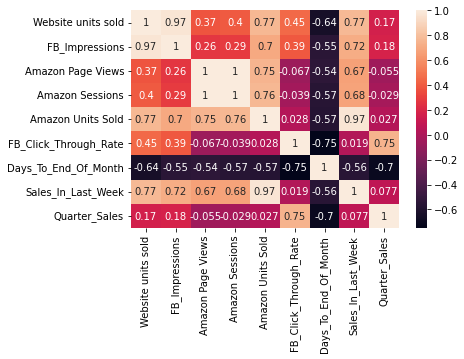

In [28]:
#plt.figure(figsize= (70,30))
sns.heatmap(corr_matrix.corr(),annot=True)
plt.show()

Amazon sales  has a high correlation with fb spend/impression/clicks and also Amazon clicks/impressions

Let's check the scatterplot as well

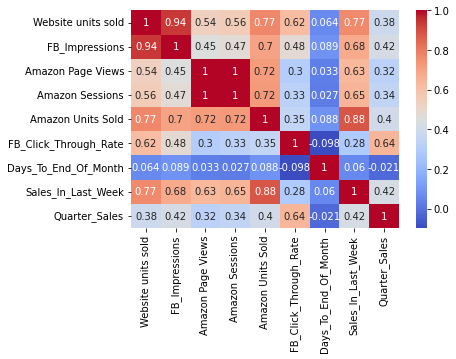

In [29]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

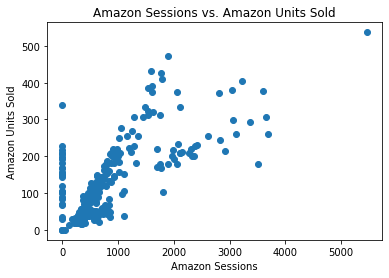

In [ ]:
plt.scatter(df['Amazon Sessions'], df['Amazon Units Sold'])

# Add axis labels and a title
plt.xlabel('Amazon Sessions')
plt.ylabel('Amazon Units Sold')
plt.title('Amazon Sessions vs. Amazon Units Sold')

# Display the plot
plt.show()

It reinstates the fact we learned.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from a CSV file into a Pandas DataFrame


# Define the independent variables and dependent variable
X = df[['Website units sold', 'FB_Ad _spend', 'FB_Impressions', 'FB_Unique Clicks', 'Day', 'Month', 'Year', 'day of the week', 'quarter', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Amazon Page Views', 'Amazon Sessions']]
y = df['Amazon Units Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X

,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,Year,day of the week,quarter,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions
0,13,540.45,38915.0,208.0,3,5,2022,2,2,0,1,0,0,0,0,0,487.0,365.0
1,16,548.41,42258.0,192.0,4,5,2022,3,2,0,0,1,0,0,0,0,439.0,308.0
2,7,285.47,21238.0,96.0,5,5,2022,4,2,0,0,0,1,0,0,0,357.0,277.0
3,0,0.00,0.0,0.0,6,5,2022,5,2,0,0,0,0,1,0,0,370.0,264.0
4,1,56.12,4253.0,9.0,7,5,2022,6,2,0,0,0,0,0,1,0,306.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,107,2464.18,163244.0,1011.0,10,2,2023,5,1,0,0,0,0,1,0,0,0.0,0.0
284,98,2381.72,140133.0,1036.0,11,2,2023,6,1,0,0,0,0,0,1,0,964.0,733.0
285,84,1809.46,91056.0,706.0,12,2,2023,7,1,0,0,0,0,0,0,1,911.0,674.0
286,66,1622.82,101713.0,697.0,13,2,2023,1,1,1,0,0,0,0,0,0,934.0,710.0


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data from a CSV file into a Pandas DataFrame


# Define the independent variables and dependent variable
X = df[['Website units sold', 'FB_Ad _spend', 'FB_Impressions', 'FB_Unique Clicks', 'Day', 'Month', 'Year', 'day of the week', 'quarter', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Amazon Page Views', 'Amazon Sessions']]

y = df['Amazon Units Sold']



# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the results
print(vif)


               feature         VIF
0   Website units sold    7.035156
1         FB_Ad _spend   25.289545
2       FB_Impressions   33.888039
3     FB_Unique Clicks   20.826582
4                  Day    1.069489
5                Month   19.913669
6                 Year    6.747246
7      day of the week         inf
8              quarter   13.528055
9               Monday         inf
10             Tuesday         inf
11           Wednesday         inf
12            Thursday         inf
13              Friday         inf
14            Saturday         inf
15              Sunday         inf
16   Amazon Page Views  274.924575
17     Amazon Sessions  285.979522


In [31]:
print(df.isna().sum())


Date                      0
Website units sold        0
FB_Ad _spend             35
FB_Impressions           35
FB_Unique Clicks         36
Day                       0
Month                     0
Year                      0
day of the week           0
quarter                   0
Monday                    0
Tuesday                   0
Wednesday                 0
Thursday                  0
Friday                    0
Saturday                  0
Sunday                    0
Amazon Page Views         0
Amazon Sessions           0
Amazon Units Sold         0
FB_Click_Through_Rate    37
Days_Since_First_Sale     0
Days_To_End_Of_Month      0
Sales_In_Last_Week        6
Quarter_Sales             0
dtype: int64


In [32]:
df = df.fillna(df.mean())

In [33]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model on the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model accuracy on the test data
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print("Intercept:", model.intercept_)
print("P-values:", model.coef_)
print('R-squared score on test data:', r2_score)


ValueError: ignored

In [57]:
# Select the independent variables
data = df
X = data[['Website units sold', 'FB_Impressions', 'FB_Unique Clicks', 'Day', 'Month', 'Year', 'day of the week', 'quarter', 'FB_Click_Through_Rate', 'Days_Since_First_Sale', 'Days_To_End_Of_Month', 'Sales_In_Last_Week', 'Quarter_Sales']]
y = data['Amazon Units Sold']
#X = df[['Website units sold', 'FB_Ad _spend', 'FB_Impressions', 'FB_Unique Clicks', 'Day', 'Month', 'Year', 'day of the week', 'quarter', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Amazon Page Views', 'Amazon Sessions']]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a multiple linear regression model on the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model accuracy on the test data
from sklearn.metrics import r2_score
import numpy as np

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('R-squared score on test data:', r2)
print('Adjusted R-squared score on test data:', adj_r2)
print("Intercept:", model.intercept_)
print("P-values:", model.coef_)

 

 # 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)



R-squared score on test data: 0.8935174988122855
Adjusted R-squared score on test data: 0.8696507313046943
Intercept: -16614735.254464706
P-values: [ 2.21512424e-01  3.59369412e-04 -3.13093090e-02  3.89729631e+01
  1.47043545e+03  8.21989702e+03 -3.31756676e+00 -8.81233285e+03
  8.44711917e+03 -4.81972819e+01 -8.77334909e+00  7.68445081e-01
  6.47647621e-01]
Mean Absolute Error: 20.573904900966834
Mean Square Error: 879.829885580959
Root Mean Square Error: 29.66192653185155


In [56]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
feature = df.drop(columns='Amazon Units Sold').columns
x = df[feature].fillna(0)
print("Check for NaN values in independent variable",x.isnull().values.any())
y = df['Amazon Units Sold']
print("Check for NaN values in independent variable",y.isnull().values.any())

Check for NaN values in independent variable False
Check for NaN values in independent variable False


In [42]:
mlr = LinearRegression()
mlr.fit(X,y)

LinearRegression()

In [44]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(X, mlr.coef_))

-11147898.301838534


[('Website units sold', 0.30843219163971475),
 ('FB_Impressions', 0.0004353622621412225),
 ('FB_Unique Clicks', -0.04242395079583121),
 ('Day', 26.939311186406982),
 ('Month', 986.6307605443659),
 ('Year', 5515.241639356231),
 ('day of the week', -3.3653658582616703),
 ('quarter', -5912.74379384333),
 ('FB_Click_Through_Rate', 6979.725531686706),
 ('Days_Since_First_Sale', -32.36071682880487),
 ('Days_To_End_Of_Month', -4.930342282090707),
 ('Sales_In_Last_Week', 0.7347956781044478),
 ('Quarter_Sales', 0.4349523760054264)]

In [47]:
y_pred_mlr = mlr.predict(X)

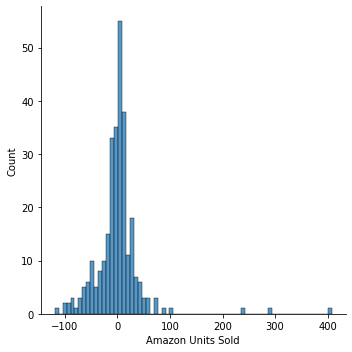

In [48]:
mlr = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred_mlr})
residual = pd.Series( y - y_pred_mlr)
sns.displot(residual)

In [49]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 24.820883445739227
Mean Square Error: 2052.077198238288
Root Mean Square Error: 45.299858699981485


In [50]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

AttributeError: ignored

Should I calculate p value to see if each of the coefficient is significant?